# Project 2: TMDB Movies 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this project, I will analyze TMDB movies dataset based on multiple criteria which are genres, year of release, and more.
I will walk through TMDB Movies dataset to answer multiple questions:
- What is the most "genres" who has the highest average vote?
- What is the most frequent average voting ?
- Which genres has the highes and lowest run time ?
- Which year has highest / lowest release movies 
- Which year has highest / lowest average vote ?
- Which movie has the highest profit ?
- What is the movie who has the highest lost ?


In [125]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

- Upload the data and try take an overview on it and see its attribute
- Check how many columns and rows there are 
- Chech the data type and if there are a nulls values 
- See the summary statistics of each attribute 
- Drop the duplicated row and make sure its deleted by see how many row we have 
- See the disribution of each attribute 
- Drop some attributes that i will not use in my analysis e.g. id and imdb_id etc...
- Replace the null with N/A.  
- Droped the nulls in 'genres'.
- Changed release_year data type to datetime. 
- Replace the zero values in revenue_adj and budget_adj columns with mean.
- Make sure everything is changed and it's clean. 

In [126]:
df = pd.read_csv(r'C:\Users\Hp\Desktop\Data Analysis\tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [127]:
df.shape

(10866, 21)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [129]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [130]:
sum(df.duplicated())

1

In [131]:
df.drop_duplicates(keep = 'first', inplace =True)

In [132]:
df.shape

(10865, 21)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E67B207518>,
      dtype=object)

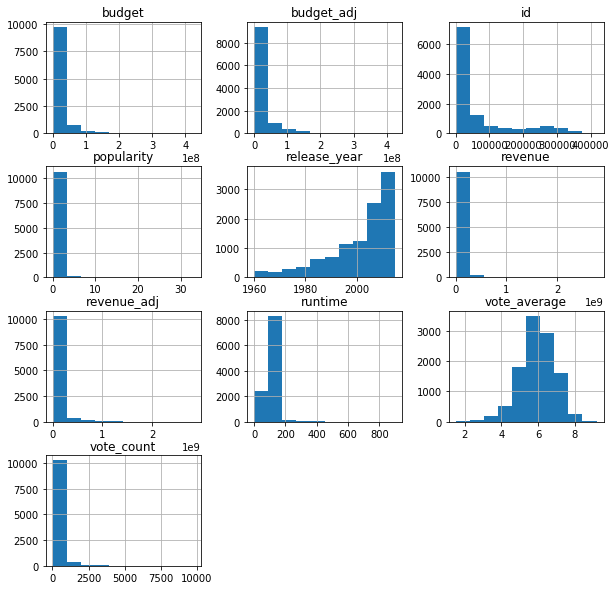

In [133]:
df.hist(figsize=(10,10))

## Data Cleaning

In [134]:
df.drop(['id', 'imdb_id', 'homepage', 'tagline', 'budget', 'revenue', 'keywords'], 
        axis = 1, inplace = True)
df.head()

,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [135]:
df['director'].fillna('N/A', inplace = True)
df['production_companies'].fillna('N/A', inplace = True)
df['overview'].fillna('N/A', inplace = True)
df['cast'].fillna('N/A', inplace = True)

In [136]:
df.dropna(inplace = True)

In [137]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [138]:
budget_mean = df['budget_adj'].mean()
revenue_mean = df['revenue_adj'].mean()
runtime_mean = df['runtime'].mean()
budget_mean, revenue_mean, runtime_mean

(17587121.438276574, 51477974.92242094, 102.1384430916805)

In [139]:
df['budget_adj']= df['budget_adj'].replace(0, budget_mean)
df['revenue_adj']= df['revenue_adj'].replace(0, revenue_mean)
df['runtime']= df['runtime'].replace(0, runtime_mean)
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.000000,10842.000000,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,102.421062,217.823649,5.974064,2001.314794,2.679108e+07,7.993283e+07
std,1.001032,30.828622,576.180993,0.934257,12.813617,3.053264e+07,1.366907e+08
min,0.000065,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.208210,90.000000,17.000000,5.400000,1995.000000,1.758712e+07,5.147797e+07
50%,0.384532,99.000000,38.000000,6.000000,2006.000000,1.758712e+07,5.147797e+07
75%,0.715393,111.000000,146.000000,6.600000,2011.000000,2.092507e+07,5.147797e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 14 columns):
popularity              10842 non-null float64
original_title          10842 non-null object
cast                    10842 non-null object
director                10842 non-null object
overview                10842 non-null object
runtime                 10842 non-null float64
genres                  10842 non-null object
production_companies    10842 non-null object
release_date            10842 non-null datetime64[ns]
vote_count              10842 non-null int64
vote_average            10842 non-null float64
release_year            10842 non-null int64
budget_adj              10842 non-null float64
revenue_adj             10842 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(2), object(6)
memory usage: 1.2+ MB


In [141]:
df.head()

,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1: What is the most "genres" who has the highest average vote?

In [142]:
df.groupby('genres').vote_average.mean()


genres
Action                                                 5.526984
Action|Adventure                                       5.333333
Action|Adventure|Animation                             6.775000
Action|Adventure|Animation|Comedy|Drama                5.600000
Action|Adventure|Animation|Comedy|Family               6.100000
Action|Adventure|Animation|Drama|Family                6.300000
Action|Adventure|Animation|Family                      6.433333
Action|Adventure|Animation|Family|Fantasy              6.866667
Action|Adventure|Animation|Family|Mystery              6.400000
Action|Adventure|Animation|Family|Science Fiction      6.225000
Action|Adventure|Animation|Fantasy                     6.200000
Action|Adventure|Animation|Fantasy|Horror              6.000000
Action|Adventure|Animation|Fantasy|Science Fiction     5.700000
Action|Adventure|Animation|Science Fiction             6.600000
Action|Adventure|Animation|Science Fiction|Crime       7.100000
Action|Adventure|Animation|Scienc

#### the most average vote is "War|Drama|Action|Adventure|History" has an average with 7.8 out of 10 and that makes a sense because a lot of people who prefer that kind of movies and the leats average vote is "Western|Horror|Thriller" and maybe because many people don't like horror movies

### Research Question 2: What is the most frequent average voting ?

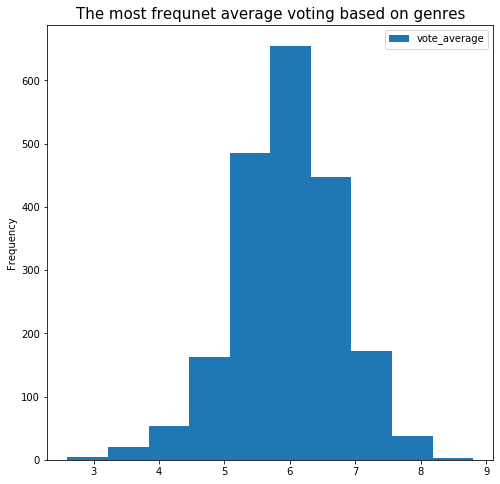

In [143]:
df.groupby('genres').vote_average.mean().plot(kind = 'hist', figsize = (8,8), fontsize = 10) 
plt.title('The most frequnet average voting based on genres', fontsize = 15)
plt.legend();

### We can notice the most frequent average voting is 6 and that makes sense because a lot of movies has this average.

### Research Question 3: Which genres has the highes and lowest run time ?

In [144]:
df.groupby(['genres']).runtime.mean()

genres
Action                                                 101.095238
Action|Adventure                                       105.600000
Action|Adventure|Animation                              80.250000
Action|Adventure|Animation|Comedy|Drama                 88.000000
Action|Adventure|Animation|Comedy|Family                82.000000
Action|Adventure|Animation|Drama|Family                 71.000000
Action|Adventure|Animation|Family                       60.333333
Action|Adventure|Animation|Family|Fantasy               56.000000
Action|Adventure|Animation|Family|Mystery               90.000000
Action|Adventure|Animation|Family|Science Fiction       85.000000
Action|Adventure|Animation|Fantasy                      99.000000
Action|Adventure|Animation|Fantasy|Horror               84.000000
Action|Adventure|Animation|Fantasy|Science Fiction      82.500000
Action|Adventure|Animation|Science Fiction              62.000000
Action|Adventure|Animation|Science Fiction|Crime        64.000000
Act

### The historical movies (War|Drama|Action|Adventure|History) its take the most average runtime 540 min and that because its a real story so it takes time to cover, and family & fantasy movies (Action|Adventure|Animation|Family|Fantasy) its take the lest average runtime 56 min and maybe that because they don't want the kids to get bored.

### Research Question 4: Which year has highest / lowest release movies 

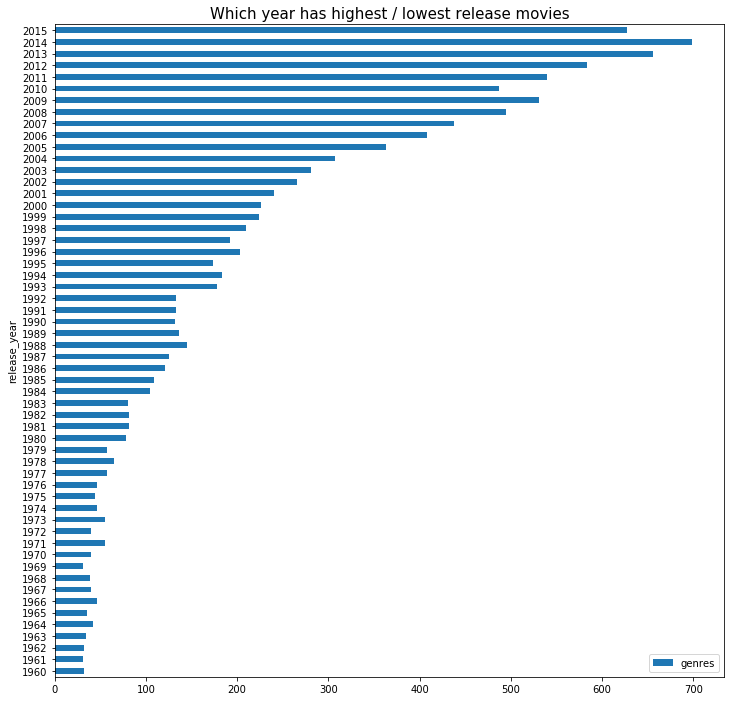

In [145]:
df.groupby(['release_year']).genres.count().plot(kind='barh', figsize=(12,12), fontsize = 10) 
plt.title('Which year has highest / lowest release movies', fontsize = 15)
plt.legend();

### The highest year whose release is 2014 by 699 movies and the lowest are 1961 and 1969 31 movies.

### Research Question 5: Which year has highest / lowest average vote ? 

In [146]:
df.groupby('release_year').vote_average.mean()

release_year
1960    6.325000
1961    6.374194
1962    6.343750
1963    6.329412
1964    6.211905
1965    6.194286
1966    6.128261
1967    6.242500
1968    6.379487
1969    5.961290
1970    6.502500
1971    6.420000
1972    6.535000
1973    6.703636
1974    6.426087
1975    6.390909
1976    6.340426
1977    6.147368
1978    6.130769
1979    6.308772
1980    6.160256
1981    6.165854
1982    6.241975
1983    5.971250
1984    6.003810
1985    6.177064
1986    6.004959
1987    6.128800
1988    5.965517
1989    6.075735
1990    5.993939
1991    6.014286
1992    6.081203
1993    6.050000
1994    5.942391
1995    6.052299
1996    5.897044
1997    5.988542
1998    5.970476
1999    6.032589
2000    5.884513
2001    5.890871
2002    5.973308
2003    5.930961
2004    5.988599
2005    5.866391
2006    5.941422
2007    5.964384
2008    5.930505
2009    5.851601
2010    5.989733
2011    5.958519
2012    5.789384
2013    5.875000
2014    5.919456
2015    5.886762
Name: vote_average, dtype: float64

### In 1973 has the highest average vote 6.7 and I have checked the movies in that year and nothing was very popular in that year but I noticed that a lot of movies the vote is between 7 and 8 and I think that the reason.       And 2012 has the lowest average vote 5.79 and also I have checked the movies and I was shocked by the greatest movies was released in that year e.g.(The Dark Knight Rises, Django Unchained, & The Avengers, etc...) and that because there are more than 100 (18%)out of 584 movies the vote in between 1 - 2.5. 

In [147]:
df['Profit'] = df['revenue_adj'] - df['budget_adj']
df.head()

,popularity,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,Profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.3,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.3,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,101199955.5,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,183999919.0,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,174799923.1,1.385749e+09,1.210949e+09


###  Research Question 6: Which movie has the highest profit ?

In [148]:
high_profit = df['Profit'].idxmax
df.loc[high_profit]

popularity                                                        12.0379
original_title                                                  Star Wars
cast                    Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...
director                                                     George Lucas
overview                Princess Leia is captured and held hostage by ...
runtime                                                               121
genres                                   Adventure|Action|Science Fiction
production_companies     Lucasfilm|Twentieth Century Fox Film Corporation
release_date                                          1977-03-20 00:00:00
vote_count                                                           4428
vote_average                                                          7.9
release_year                                                         1977
budget_adj                                                    3.95756e+07
revenue_adj                           

### Star Wars 1977 is the highest profit its genres is Adventure|Action|Science with a profit $2,750,140,000

### Research Question 7: What is the movie who has the highest lost ?

In [149]:
low_profit = df['Profit'].idxmin
df.loc[low_profit]

popularity                                                        0.25054
original_title                                          The Warrior's Way
cast                    Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director                                                       Sngmoo Lee
overview                An Asian assassin (Dong-gun Jang) is forced to...
runtime                                                               100
genres                          Adventure|Fantasy|Action|Western|Thriller
production_companies                             Boram Entertainment Inc.
release_date                                          2010-12-02 00:00:00
vote_count                                                             74
vote_average                                                          6.4
release_year                                                         2010
budget_adj                                                       4.25e+08
revenue_adj                           

### The Warrior's Way 2010 has the highest lost -$413,912,000 and its genres are Adventure|Fantasy|Action|Western|Thriller

### Research Question 8: Does the popularity affected by the average vote?

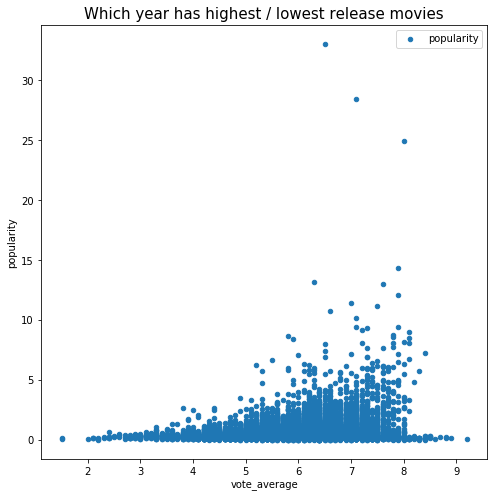

In [150]:
df.plot(x='vote_average', y='popularity', kind='scatter', figsize = (8,8), fontsize = 10, label= 'popularity') 
plt.title('Which year has highest / lowest release movies', fontsize = 15)
plt.legend();

### As we can see in the chart the answer is Yes because of the vote average increase the popularity will increase as well.

### Research Question 8: Does the popularity of the movies increase over the years?

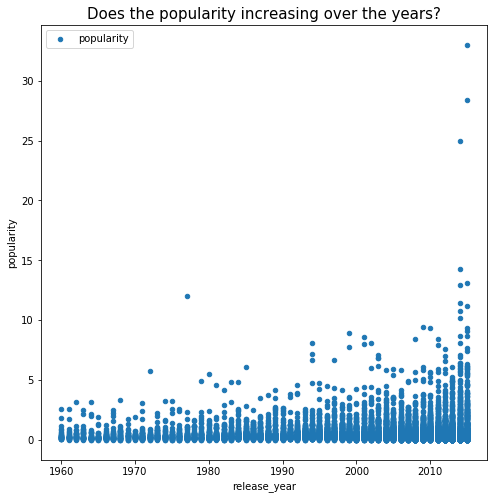

In [151]:
df.plot(x='release_year', y='popularity', kind='scatter', figsize = (8,8), fontsize = 10, label= 'popularity') 
plt.title('Does the popularity increasing over the years?', fontsize = 15)
plt.legend();

### We can notice the popularity is vacillating over the years but in general it's increasing

<a id='conclusions'></a>
## Conclusions
 
first of all, I try to discover and understand the data by seeing its attributes and see how many columns and rows and see if there are any null values and check the data type and see the summary statistics of each attributes then a try to find if there is any duplicated row then I delete it finally I try to see the distribution of each attribute. 

secondly, I start cleaning by drop some attributes that will be useless such as id, imdb_id, homepage, tagline, keywords, etc...
then I replace the nulls values with N/A and the one who has a few nulls I dropped them. 

finally, I start data exploratory by some asking questions such as see the most "genres" who has the highest average voting, Which genres has the highest and lowest run time, Which year has highest / lowest average vote and finally see the movie who has the highest profit and highest lost. 

### Limitations
1- There is a duplicate row and I dropped it so the analysis be correct. 

2- I dropped some extraneous columns in the data wangling process. Some of them may yield other useful results, e.g. id, tmdb_id, homepage, etc...

3- There are a lot of attributes that have null values some of them I replace it with N/A because it has a high number of null and it doesn't affect the analysis directly and the other I dropped them because it few and it affects the analyzing.

4- There are many of zero values in revenue_adj and budget_adj columns.I replace the zero value with mean. There might be alternative ways to better process to this kind of issue. 

5- Some of the movies have more than one genre and that will affect the level of accuracy of the analysis.